In [1]:
import torch
torch.set_default_tensor_type(torch.DoubleTensor)

import numpy as np
import matplotlib.pyplot as plt
import os, sys
from load_data import load_tiny_nerf_data
from mlp_network import create_model
from rays import get_rays,render_rays

c:\Users\Hypoxanthine\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
images,poses,(H,W),focal,(testimg,testpose) = load_tiny_nerf_data()
images = images.to(device)
poses = poses.to(device)
focal = focal.to(device)
testimg = testimg.to(device)
testpose = testpose.to(device)
model,optimizer = create_model(6)
model = model.to(device)

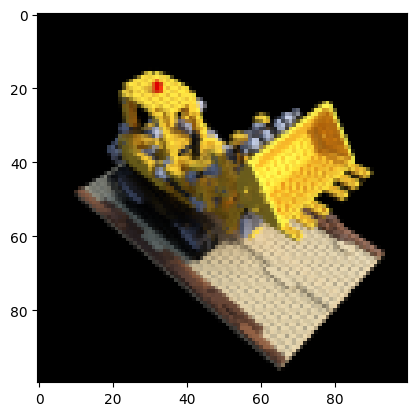

In [4]:
plt.imshow(testimg.cpu().detach().numpy())
plt.show()

In [5]:
N_samples = 64
N_iters = 1000
psnrs = []
iternums = []
i_plot = 25

0 0.07476619720458984 secs per iter


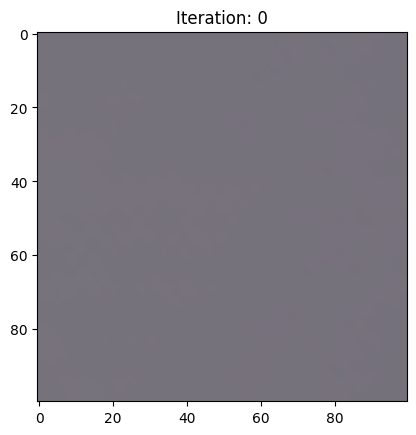

25 3.7708457374572752 secs per iter


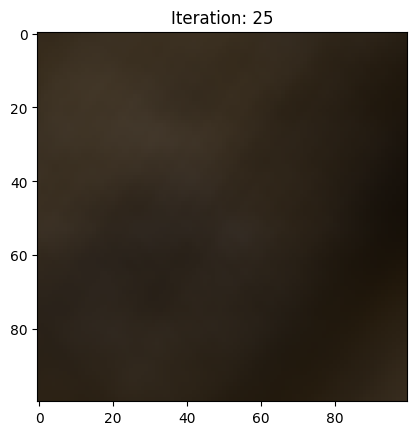

50 3.7544262981414795 secs per iter


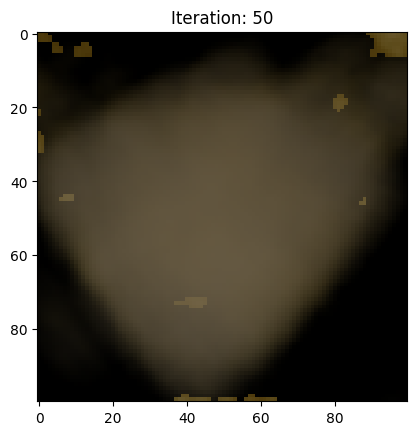

75 3.752801275253296 secs per iter


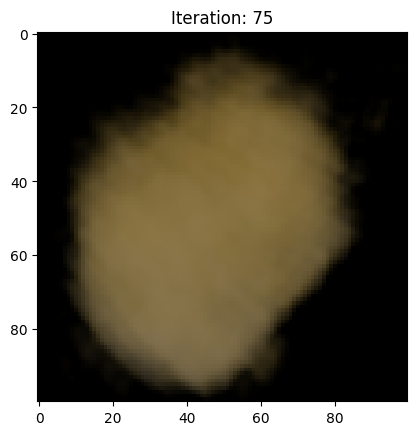

100 3.7529633331298826 secs per iter


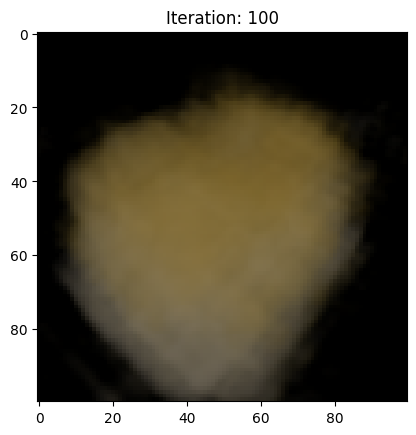

125 3.753366527557373 secs per iter


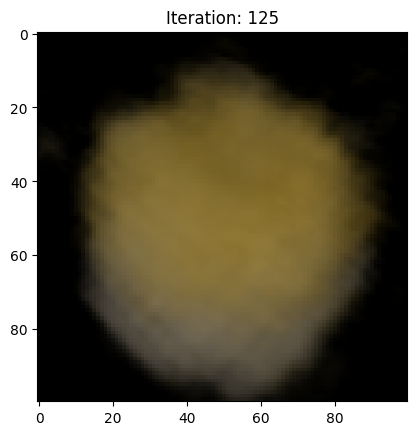

150 3.758382577896118 secs per iter


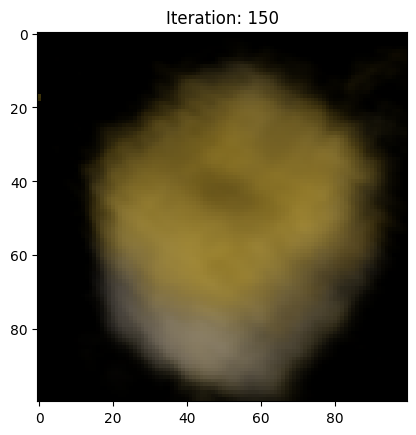

175 3.7538668727874756 secs per iter


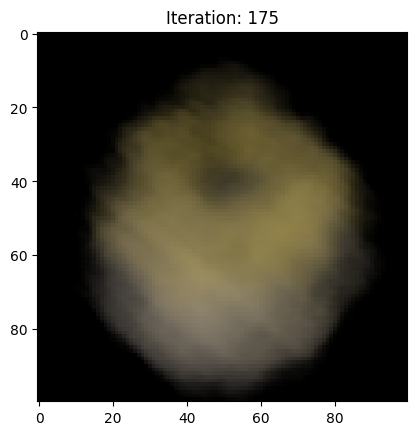

200 3.754443874359131 secs per iter


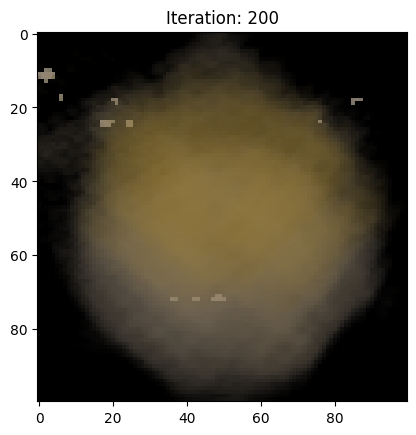

225 3.7544304943084716 secs per iter


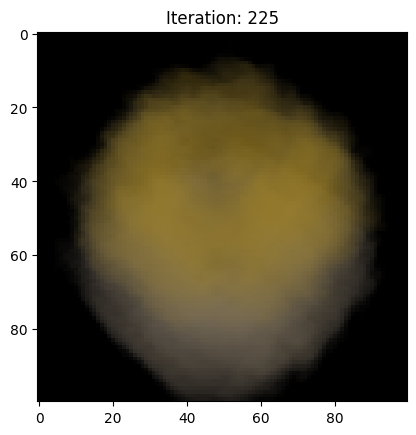

250 3.7532160663604737 secs per iter


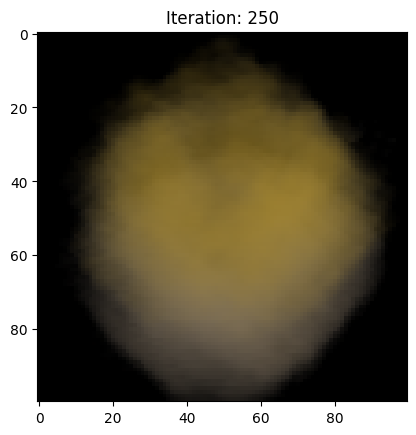

275 3.7533304023742677 secs per iter


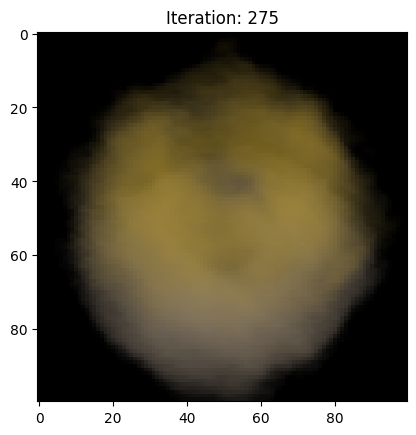

300 3.7533330154418945 secs per iter


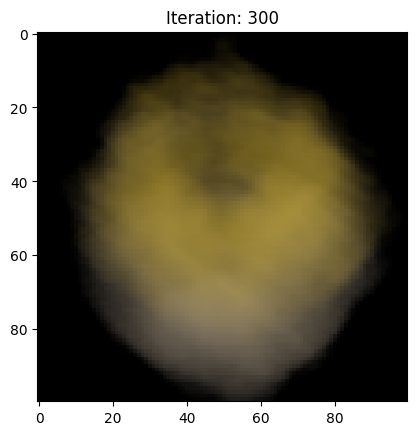

325 3.7534421825408937 secs per iter


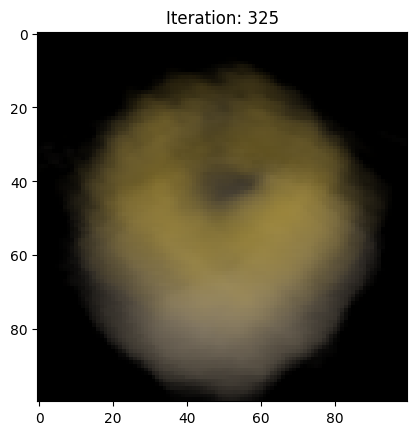

350 3.753566722869873 secs per iter


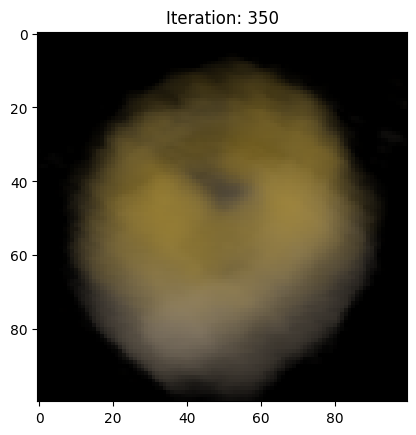

375 3.7533365726470946 secs per iter


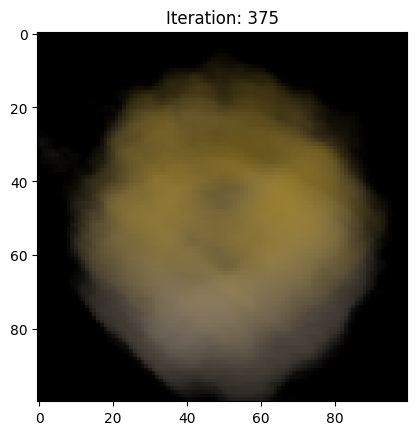

400 3.753042516708374 secs per iter


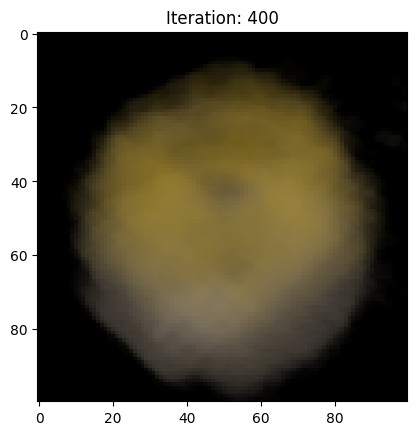

425 3.7531249141693115 secs per iter


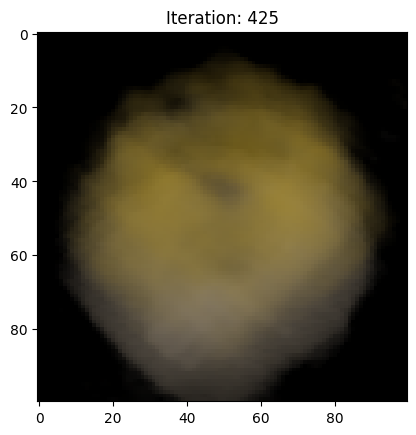

450 3.7544035148620605 secs per iter


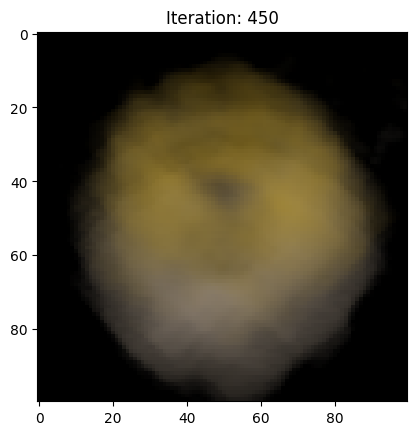

475 3.755622749328613 secs per iter


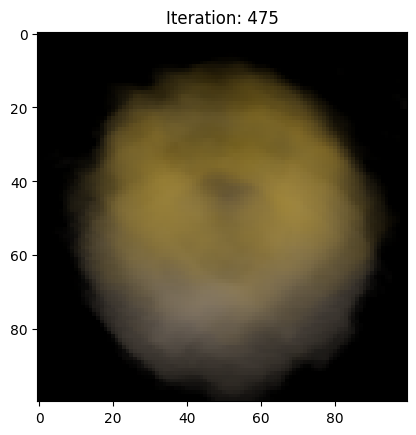

500 3.7558274936676024 secs per iter


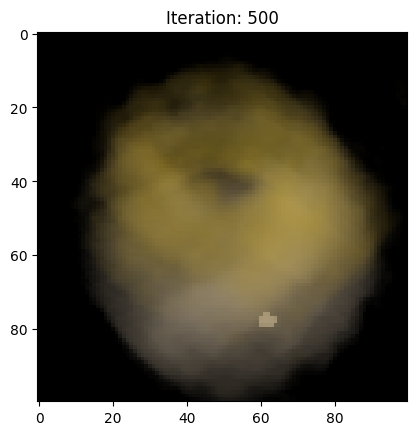

525 3.7562289905548094 secs per iter


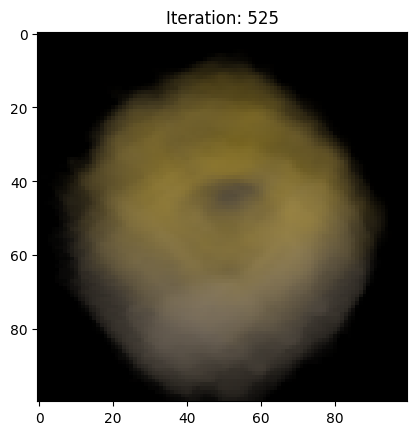

550 3.755721492767334 secs per iter


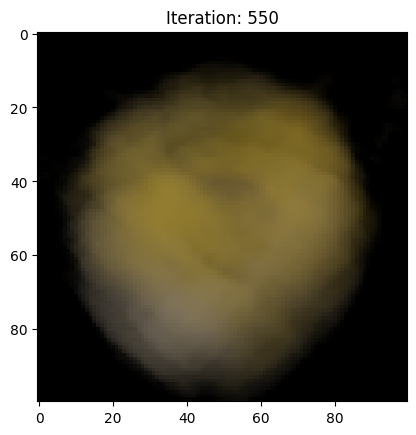

575 3.7562621021270752 secs per iter


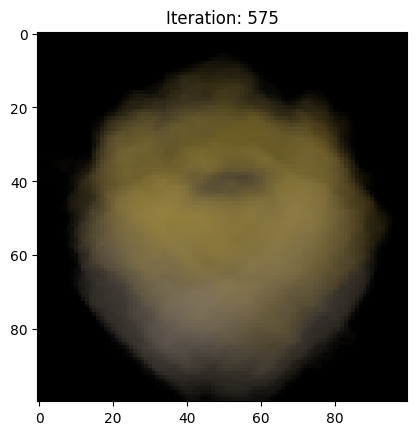

600 3.758284692764282 secs per iter


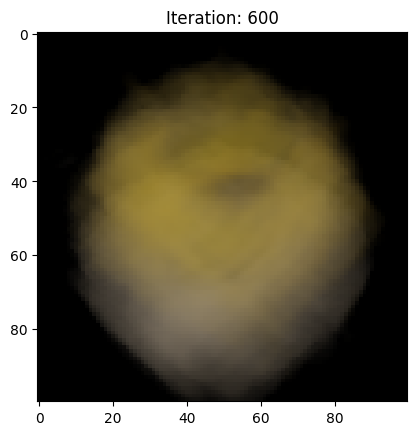

625 3.755740613937378 secs per iter


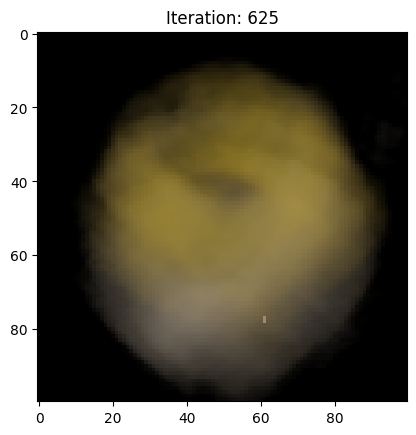

650 3.755546112060547 secs per iter


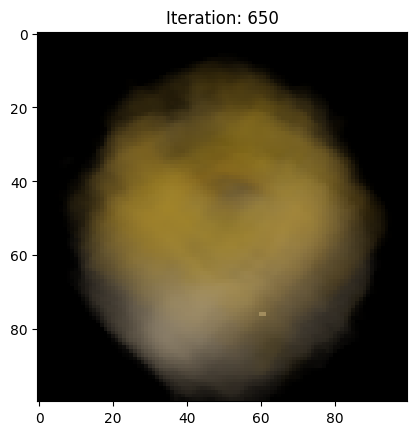

675 3.755832471847534 secs per iter


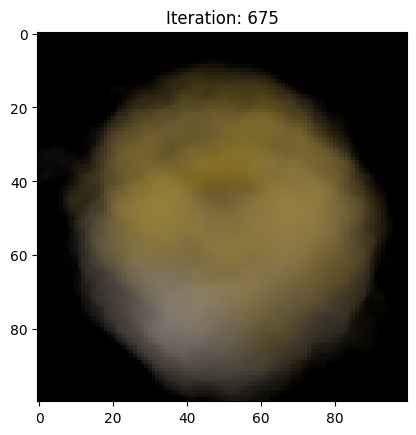

700 3.7557099151611326 secs per iter


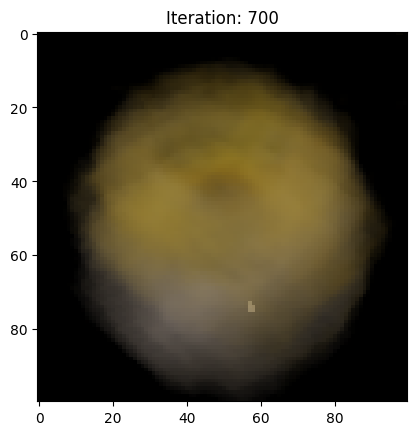

725 3.755108346939087 secs per iter


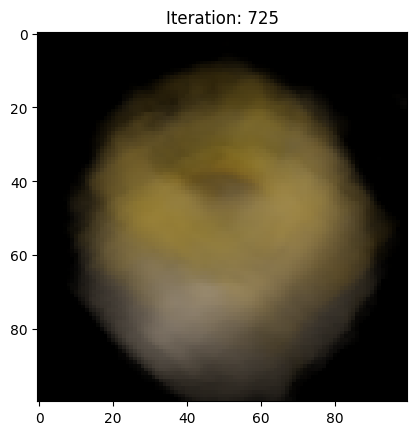

750 3.756058168411255 secs per iter


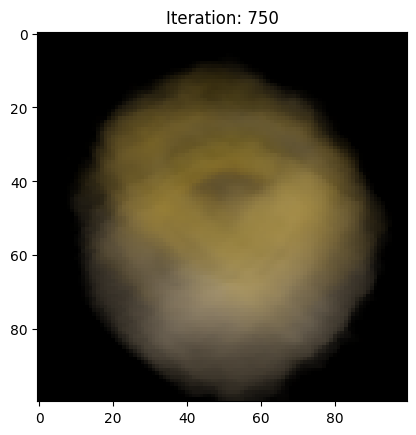

775 3.7561199855804444 secs per iter


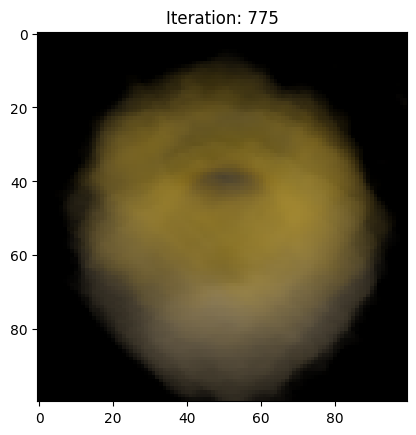

800 3.7557072257995605 secs per iter


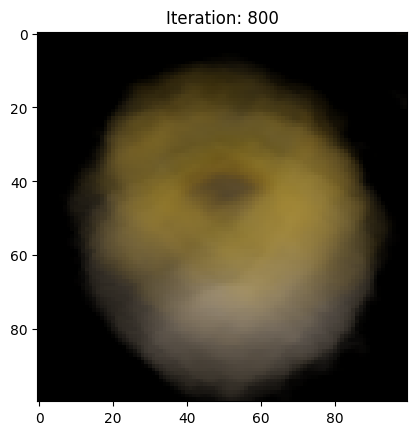

825 3.755950756072998 secs per iter


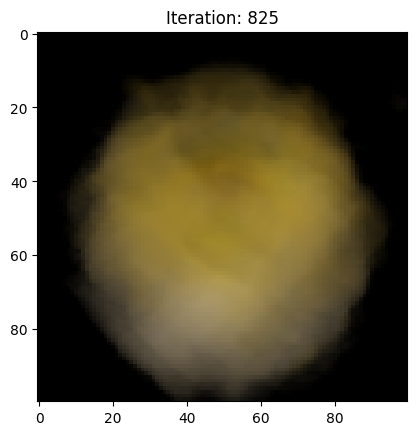

850 3.755654296875 secs per iter


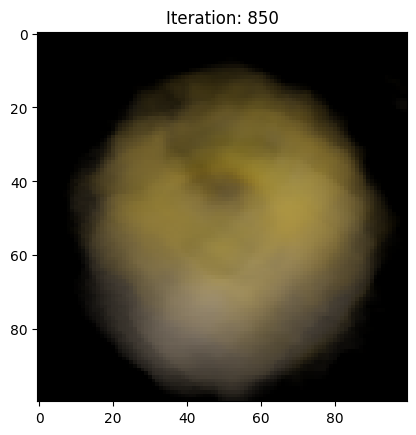

875 3.755483808517456 secs per iter


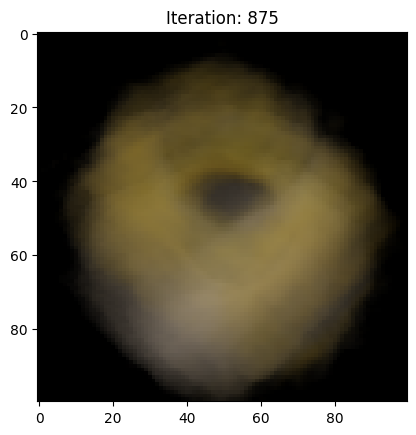

900 3.755486555099487 secs per iter


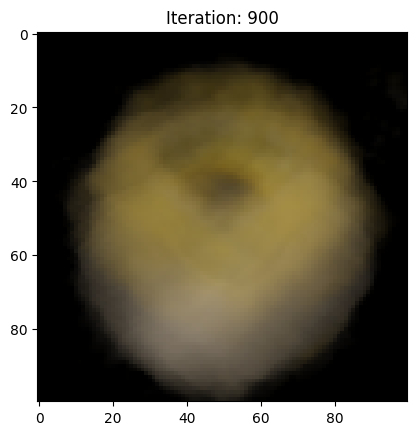

925 3.755742702484131 secs per iter


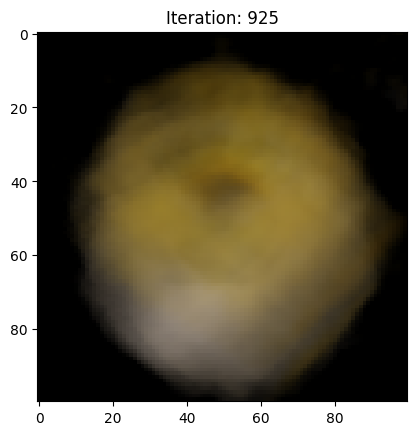

950 3.75630895614624 secs per iter


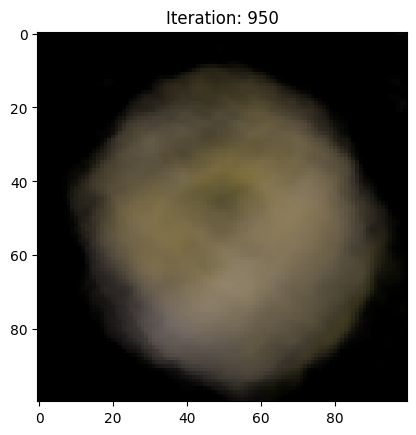

975 3.7558024597167967 secs per iter


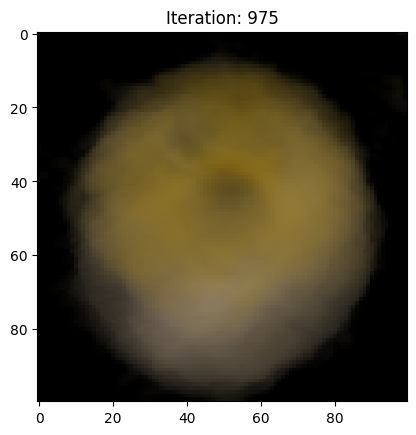

1000 3.755468587875366 secs per iter


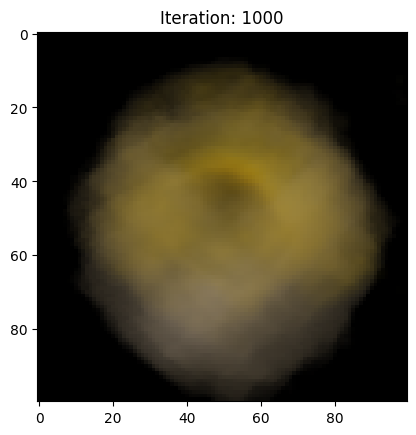

Done


In [6]:
import time
t = time.time()
for i in range(N_iters+1):
    img_i = np.random.randint(images.shape[0])
    target = images[img_i]
    pose = poses[img_i]
    rays_o,rays_d = get_rays(H,W,focal,pose)

    
    rgb, depth, acc = render_rays(model, rays_o, rays_d,zmin= 2.,zmax= 6.,N_samples= N_samples)
    loss = torch.mean(torch.square(rgb - testimg))
    psnr = -10. * torch.log10(loss)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if i%i_plot==0:
        print(i, (time.time() - t) / i_plot, 'secs per iter')
        t = time.time()
        
        rays_o, rays_d = get_rays(H, W, focal, testpose)
        rgb, depth, acc = render_rays(model, rays_o, rays_d,zmin= 2.,zmax= 6.,N_samples= N_samples)
        loss = torch.mean(torch.square(rgb - testimg))
        
        psnr = -10. * torch.log10(loss)
        plt.imshow(rgb.cpu().detach().numpy())
        plt.title(f'Iteration: {i}')
        plt.show()
        

print('Done')